In [15]:
import ssl
import time

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/main/'
    'datasets/adult-census.csv')
print(df.shape)
df.head()

(48842, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
target_name = 'class'
X = df.copy()
y = X.pop(target_name)

In [4]:
numerics = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
X_num = X[numerics]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_num, y, random_state=24)

In [6]:
X_train.describe()

,age,capital-gain,capital-loss,hours-per-week
count,36631.000000,36631.000000,36631.000000,36631.000000
mean,38.631023,1078.415850,86.752259,40.429472
std,13.671774,7471.856652,401.456173,12.428270
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [8]:
scaler.mean_

array([  38.6310229 , 1078.41584996,   86.75225902,   40.4294723 ])

In [9]:
scaler.scale_

array([  13.67158777, 7471.75466313,  401.45069362,   12.42810071])

In [10]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.41187776, -0.14433234, -0.21609692, -0.43687064],
       [-0.99703291, -0.14433234, -0.21609692, -0.03455655],
       [-0.41187776, -0.14433234, -0.21609692, -0.03455655],
       ...,
       [-1.21646609, -0.14433234, -0.21609692, -0.03455655],
       [ 3.75735269, -0.14433234,  4.3299159 ,  0.77007162],
       [ 0.17327739, -0.14433234, -0.21609692, -0.03455655]])

In [11]:
scaler = StandardScaler().set_output(transform='pandas')
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

,age,capital-gain,capital-loss,hours-per-week
101,-0.411878,-0.144332,-0.216097,-0.436871
29653,-0.997033,-0.144332,-0.216097,-0.034557
11101,-0.411878,-0.144332,-0.216097,-0.034557
16255,0.319566,-0.144332,4.521720,0.770072
41835,0.904721,0.884609,-0.216097,0.770072
...,...,...,...,...
21633,-0.923889,-0.144332,-0.216097,-0.436871
19857,-1.582188,-0.144332,-0.216097,-1.643813
14528,-1.216466,-0.144332,-0.216097,-0.034557
899,3.757353,-0.144332,4.329916,0.770072


In [12]:
X_train_scaled.describe().round(4)

,age,capital-gain,capital-loss,hours-per-week
count,36631.0000,36631.0000,36631.0000,36631.0000
mean,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.5822,-0.1443,-0.2161,-3.1726
25%,-0.7776,-0.1443,-0.2161,-0.0346
50%,-0.1193,-0.1443,-0.2161,-0.0346
75%,0.6853,-0.1443,-0.2161,0.3678
max,3.7574,13.2393,10.6346,4.7127


In [13]:
N = 300

Text(0.5, 1.1, 'After scaling')

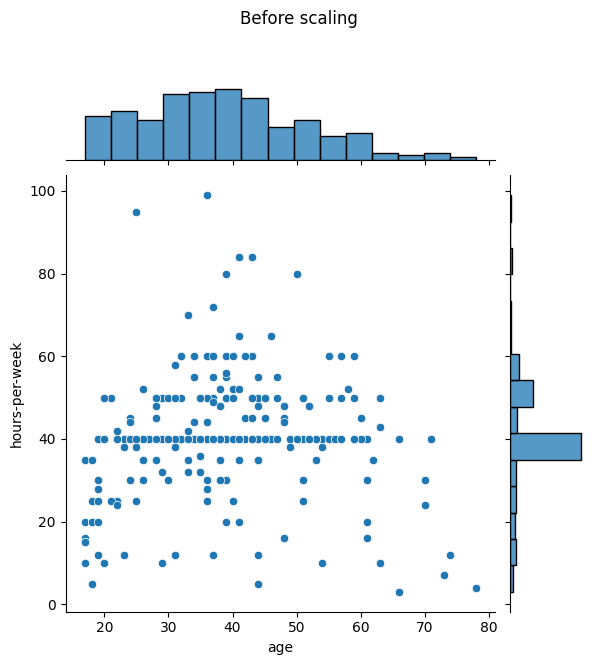

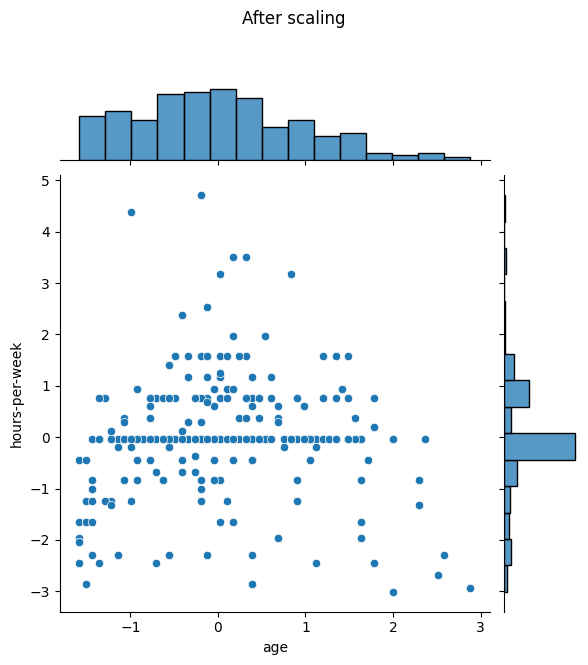

In [14]:
sns.jointplot(
    data=X_train[:N],
    x='age',
    y='hours-per-week',
    marginal_kws={'bins': 15})
plt.suptitle('Before scaling', y=1.1)
sns.jointplot(
    data=X_train_scaled[:N],
    x='age',
    y='hours-per-week',
    marginal_kws={'bins': 15})
plt.suptitle('After scaling', y=1.1)

In [16]:
mod = make_pipeline(StandardScaler(), LogisticRegression())
mod

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
mod.named_steps

{'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression()}

In [18]:
start = time.time()
mod.fit(X_train, y_train)
elapsed = time.time() - start
elapsed

0.127424955368042